Importing pandas

In [2]:
import pandas as pd

Downloaded the data using data retriever. Just wanted to see the names of the files that were downloaded

In [3]:
ls

Homework5.ipynb
README.md
mapped_plant_quads_co_allrecords_cover.csv
mapped_plant_quads_co_allrecords_density.csv
mapped_plant_quads_co_daily_climate.csv
mapped_plant_quads_co_quad_info.csv
mapped_plant_quads_co_quad_inventory.csv
mapped_plant_quads_co_quad_stocking_rate.csv
mapped_plant_quads_co_species_list.csv
mapped_plant_quads_co_species_name_changes.csv


I want to give names to each of the files to make it easy to call those files

In [4]:
cover = pd.read_csv('mapped_plant_quads_co_allrecords_cover.csv')

In [5]:
density = pd.read_csv('mapped_plant_quads_co_allrecords_density.csv')
dailyclimate= pd.read_csv('mapped_plant_quads_co_daily_climate.csv')
quadinfo= pd.read_csv('mapped_plant_quads_co_quad_info.csv')
quadinventory= pd.read_csv('mapped_plant_quads_co_quad_inventory.csv')
quadstockingrate=pd.read_csv('mapped_plant_quads_co_quad_stocking_rate.csv')
specieslist = pd.read_csv('mapped_plant_quads_co_species_list.csv')
speciesnamechanges= pd.read_csv('mapped_plant_quads_co_species_name_changes.csv')

Place to view each of the files. Found the file that I need for Question 1.

In [7]:
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [11]:
%matplotlib inline

Need to organize the above table in order to extract the infomation that I need. The question asks for a plot of the area covered by each species for each year. 

In [12]:
speciesarea = cover.groupby(['year','species'], as_index = False).area.sum()

View the data that was extracted, to ensure that the above line did what I wanted it to

In [13]:
speciesarea.head()

,year,species,area
0,1997,Aristida longiseta,0.045079
1,1997,Artemisia frigida,0.117615
2,1997,Bare ground,15.606260
3,1997,Bouteloua gracilis,6.907601
4,1997,Buchloe dactyloides,0.488100


Starting to set up the plot. Looking to create a stacked plot showing the area covered by each species for each of the years. Need to pivot the above table in order instruct the computer, what I want to do. 

In [14]:
speciesarea_quad = speciesarea.pivot(index = 'year', columns = 'species', values = 'area')

Creating the stacked plot. Need more information from the authors in order to determine their units of measurement. 

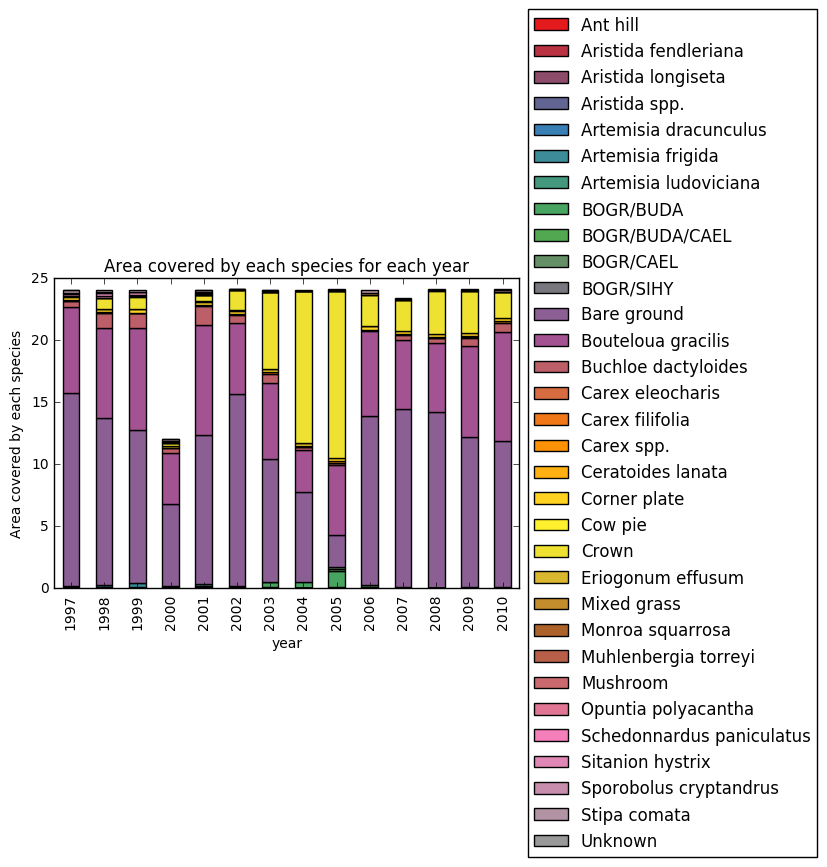

In [45]:
plot1 = speciesarea_quad.plot(kind= 'bar', stacked= True, colormap="Set1", title = "Area covered by each species for each year")
plot1.set_xlabel("year")
plot1.set_ylabel("Area covered by each species")
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The results suggests that Bare ground covers most of the area on most of the years being sampled (1997-2003 & 2006- 2010). During these years Bouteloua gracilis is the species that covers the most area. This species is generally present in a relatively high abundance throughout the whole duration of the study. The species Crown, appears to become abundant in the years 2004 and 2005. Since I did not collect this data and I'm not an ecologist, I need to figure out whether bare ground is a plant, what Bouteloua gracilis is and what crown is. 

In [50]:
speciesarea.head()

,year,species,area
0,1997,Aristida longiseta,0.045079
1,1997,Artemisia frigida,0.117615
2,1997,Bare ground,15.606260
3,1997,Bouteloua gracilis,6.907601
4,1997,Buchloe dactyloides,0.488100


Viewing the table that I need to merge for question 2

In [51]:
specieslist.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


Merging the above table with the previous table in order to answer the second question which involves a plot of the area covered by each growth-form for each year 

In [25]:
merged_specieslist_cover = pd.merge(left = cover, right = specieslist, left_on= 'species', right_on = 'species') 

Ensuring that the resulting table is what I expect

In [27]:
merged_specieslist_cover.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Corner plate,0.002010,0.972418,0.982564,NaN,1299.0,Not plant,Not plant
2,gzgz_11,1997,Corner plate,0.003450,0.024583,0.033874,NaN,1299.0,Not plant,Not plant
3,gzgz_11,1997,Corner plate,0.003378,0.972815,0.030933,NaN,1299.0,Not plant,Not plant
4,gzgz_11,1998,Corner plate,0.001628,0.020976,0.981848,NaN,1299.0,Not plant,Not plant


Pivoting the above table in order to prepare the graph

In [29]:
growthform_year = merged_specieslist_cover.groupby(['year', 'growthform'], as_index=False).area.sum()

In [30]:
growthform_year_wide= growthform_year.pivot(index= 'year', columns = 'growthform', values = 'area')

Checking to make sure that the resulting table is what I want

In [31]:
growthform_year_wide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
year,,,,,
1997,NaN,15.924538,0.004016,7.979310,0.133389
1998,0.883835,13.721476,NaN,9.214863,0.233096
1999,1.001064,12.682916,NaN,10.059053,0.302240
2000,0.287084,6.790056,0.000349,4.772160,0.167591
2001,0.503875,12.287331,0.017111,11.035961,0.235150


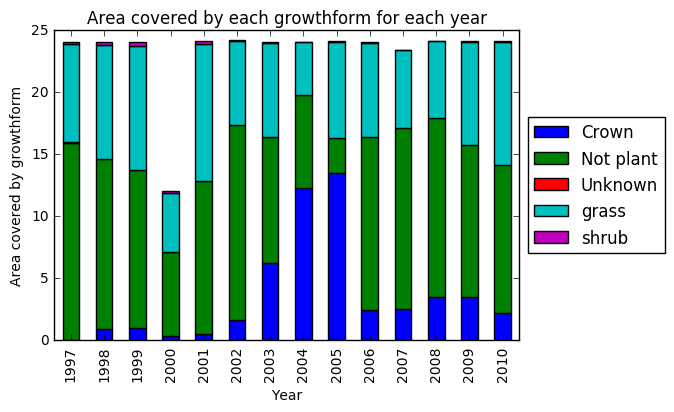

In [44]:
plot2 = growthform_year_wide.plot(kind = 'bar', stacked = True, title = 'Area covered by each growthform for each year')
plot2.set_xlabel("Year")
plot2.set_ylabel("Area covered by growthform")
plot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The results indicate that Bare ground is not a plant, while Bouteloua gracilis is a grass and Crown is a plant (as it is not listed as not a plant). The results also indicate that non-plant matter covers the most area for most of the years. This is not true for 2004 and 2005 (and perhaps 2001), where either crown or grass species become abundunt. An interesting question is whether an increased precipitation was the cause of this increased growth of species, which is the focus of the third question   

Need to view the data that is needed to do this

In [61]:
dailyclimate.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


Need to calculate the mean precipitation for each year and convert into table.

In [64]:
avg_prec= dailyclimate.groupby('year', as_index= False).precip.mean()

In [65]:
avg_prec

,year,precip
0,1997,1.543701
1,1998,0.964534
2,1999,1.649775
3,2000,0.694447
4,2001,0.882880
5,2002,0.559414
6,2003,0.978355
7,2004,0.843191
8,2005,1.303524
9,2006,1.013762


Now creating table that contained the area covered by each growthform

In [66]:
year_sum= merged_specieslist_cover.groupby(['year', 'growthform'], as_index=False).area.sum()

In [67]:
year_sum.head()

,year,growthform,area
0,1997,Not plant,15.924538
1,1997,Unknown,0.004016
2,1997,grass,7.979310
3,1997,shrub,0.133389
4,1998,Crown,0.883835


Now merging the two tables to help determine the relationship between precipitation as a function of year and area covered by each growthform. 

In [68]:
merged_prec_growthform = pd.merge(left = year_sum, right = avg_prec, left_on= 'year', right_on = 'year') 

In [69]:
merged_prec_growthform.head()

,year,growthform,area,precip
0,1997,Not plant,15.924538,1.543701
1,1997,Unknown,0.004016,1.543701
2,1997,grass,7.979310,1.543701
3,1997,shrub,0.133389,1.543701
4,1998,Crown,0.883835,0.964534


Pivoting the table in order to help graph the area covered by each growth form vs precipitation

In [73]:
precgrowthform_wide= merged_prec_growthform.pivot(index= 'precip', columns = 'growthform', values = 'area')

In [74]:
precgrowthform_wide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,1.647143,15.720092,NaN,6.708050,0.086694
0.694447,0.287084,6.790056,0.000349,4.772160,0.167591
0.843191,12.285852,7.509052,NaN,4.258776,0.010477
0.882880,0.503875,12.287331,0.017111,11.035961,0.235150
0.964534,0.883835,13.721476,NaN,9.214863,0.233096


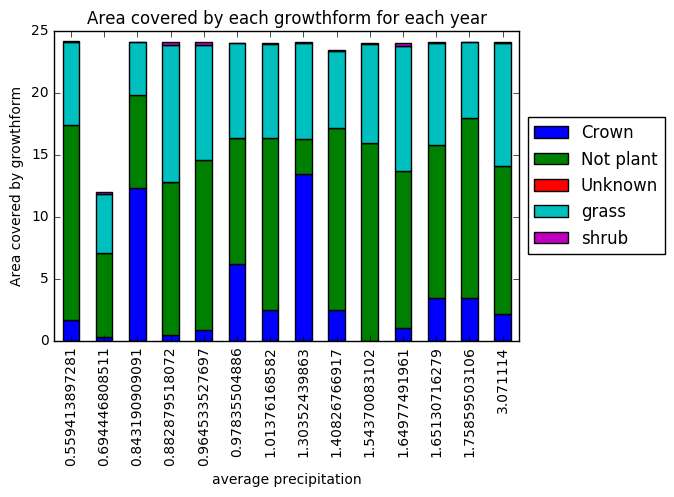

In [75]:
plot3 = precgrowthform_wide.plot(kind = 'bar', stacked = True, title = 'Area covered by each growthform for each year')
plot3.set_xlabel("average precipitation")
plot3.set_ylabel("Area covered by growthform")
plot3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The results seem to indicate that an increased rainfall is not the reason behind the increased growth seen in those years.

My next aim is to determine if species growth (area covered by species) was influenced by elevation

Just checking to see what files I have

In [97]:
ls

Homework5.ipynb
README.md
mapped_plant_quads_co_allrecords_cover.csv
mapped_plant_quads_co_allrecords_density.csv
mapped_plant_quads_co_daily_climate.csv
mapped_plant_quads_co_quad_info.csv
mapped_plant_quads_co_quad_inventory.csv
mapped_plant_quads_co_quad_stocking_rate.csv
mapped_plant_quads_co_species_list.csv
mapped_plant_quads_co_species_name_changes.csv


Identifying the data that I need

In [137]:
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [138]:
quadinfo.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


Merging the tables to see if there is a correlation between the area covered by a species and the elevation where it was sampled.

In [139]:
quad_cover = pd.merge(left = cover, right = quadinfo, left_on= 'quad', right_on = 'quadrat') 

In [140]:
quad_cover.head()

,quad,year,species,area,x,y,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed


Grouping by elevation and species

In [142]:
breed_speciesarea= quad_cover.groupby(['elevation', 'species'], as_index=False).area.sum()

In [143]:
breed_speciesarea.head()

,elevation,species,area
0,1629,Ant hill,0.004095
1,1629,Aristida longiseta,0.001367
2,1629,Bare ground,8.984346
3,1629,Bouteloua gracilis,3.531564
4,1629,Carex eleocharis,0.002075


Plotting graph

In [134]:
breed_speciesarea_wide= breed_speciesarea.pivot(index= 'elevation', columns = 'species', values = 'area')

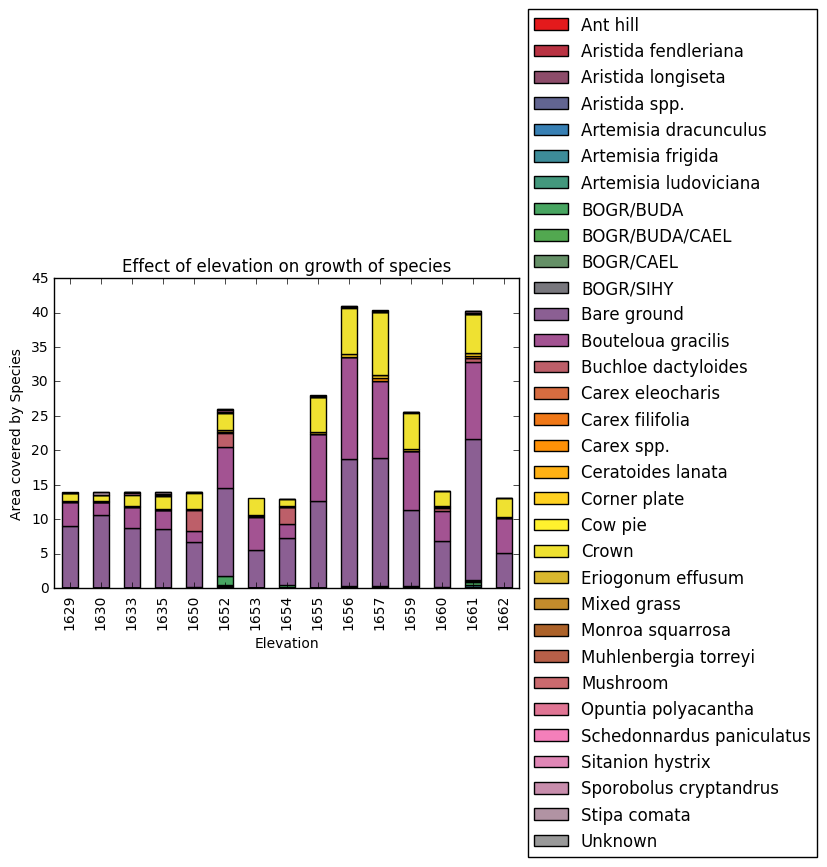

In [144]:
plot4 = breed_speciesarea_wide.plot(kind = 'bar', stacked = True, colormap="Set1", title = 'Effect of elevation on growth of species')
plot4.set_xlabel("Elevation")
plot4.set_ylabel("Area covered by Species")
plot4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The results show that most of the sampling was done at certain elevations. Bare ground appears to cover most of these sites.  